<a href="https://colab.research.google.com/github/GaikwadSandesh/Tensorflow_tutorials/blob/main/handwritten_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

## load data

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train) , len(X_test)

(60000, 10000)

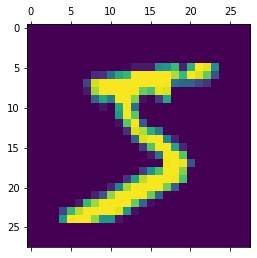

In [4]:
plt.matshow(X_train[0])

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [7]:
X_train_flattened.shape 

(60000, 784)

# basic

In [8]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4675 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3046 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9197
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2735 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2666 - accuracy: 0.9263


In [9]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2687 - accuracy: 0.9255


[0.26869550347328186, 0.9254999756813049]

In [10]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.1715522e-02, 3.5552057e-07, 5.8024734e-02, 9.5832634e-01,
       2.3505688e-03, 1.4892197e-01, 1.5952651e-06, 9.9982584e-01,
       1.3773978e-01, 6.4406550e-01], dtype=float32)

In [11]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [12]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(33.0, 0.5, 'Truth')

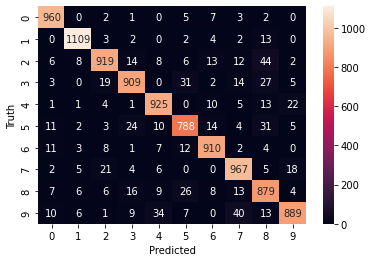

In [13]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# With hidden Layers

In [14]:
model = keras.Sequential([
                          keras.layers.Dense(100, input_shape=(784,), activation = 'relu' ),
                          keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2722 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1229 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0853 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0507 - accuracy: 0.9841


In [15]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0812 - accuracy: 0.9757


[0.0812004879117012, 0.9757000207901001]

Text(69.0, 0.5, 'Truth')

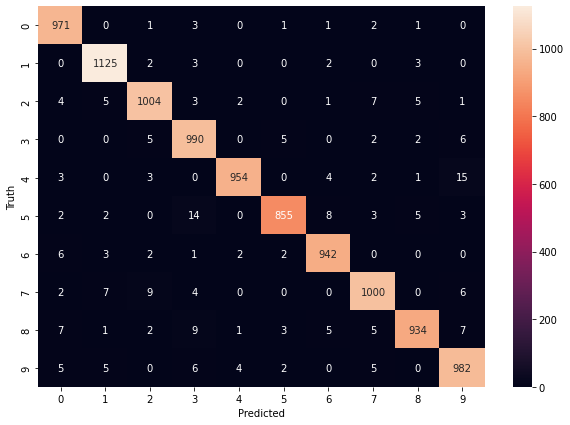

In [17]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

 ### Using Flatten layer so that we don't have to call .reshape on input dataset

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2752 - accuracy: 0.9227
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1252 - accuracy: 0.9631
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0866 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0659 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0519 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0432 - accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0341 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0283 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0236 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [19]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.9783


[0.07781781256198883, 0.9782999753952026]

#without hidden layer - 92.57 %
# with one hidden layer - 97.79 %
